# FET445 - Veri Madenciliği Projesi
## İstanbul Toplu Taşıma Veri Analizi
### Adım 1: Proje Başlatma ve Veri Setini Tanıma


In [10]:
import pandas as pd
import numpy as np

# Görünüm ayarları (isteğe bağlı)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

# Veri dosyasının yolu
path = "/Users/tuanasimsek/Desktop/veri/data/eylul2024_transport.csv"

# Dosyayı oku
data = pd.read_csv(path)

# İlk 5 satırı görüntüle
data.head()

,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,product_kind,transaction_type_desc,town,line_name,station_poi_desc_cd
0,2024-09-01,0,2,RAYLI,KIRAZLI-BASAKSEHIR/METROKENT,Normal,3,3,TAM,Tam Kontur,BASAKSEHIR,M3,IKITELLI SANAYI
1,2024-09-01,0,2,RAYLI,TOPKAPI-HABIBLER,Normal,1,1,UCRETSIZ,Ucretsiz,SULTANGAZI,T4,HACI SUKRU
2,2024-09-01,0,2,RAYLI,HALKALI - GEBZE,Normal,1,1,TAM,Tam Kontur,FATIH,MARMARAY,YENIKAPI-1
3,2024-09-01,0,3,DENİZ,ADALAR,Normal,1,1,NaN,Tam Kontur,ADALAR,MT-ADA,BUYUKADA
4,2024-09-01,0,2,RAYLI,HALKALI - GEBZE,Normal,1,1,NaN,Tam Kontur,PENDIK,MARMARAY,PENDIK


In [11]:
# Veri setinin boyutu (satır, sütun)
print("Veri boyutu:", data.shape)

# Sütun isimleri
print("\nSütunlar:")
print(data.columns.tolist())

# Veri türleri ve boş değer durumu
print("\nVeri tipi ve eksik değer bilgisi:")
print(data.info())

# Sayısal sütunlara ilişkin istatistiksel özet
print("\nİstatistiksel özet:")
print(data.describe())


Veri boyutu: (3958389, 13)

Sütunlar:
['transition_date', 'transition_hour', 'transport_type_id', 'road_type', 'line', 'transfer_type', 'number_of_passage', 'number_of_passenger', 'product_kind', 'transaction_type_desc', 'town', 'line_name', 'station_poi_desc_cd']

Veri tipi ve eksik değer bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3958389 entries, 0 to 3958388
Data columns (total 13 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   transition_date        object
 1   transition_hour        int64 
 2   transport_type_id      int64 
 3   road_type              object
 4   line                   object
 5   transfer_type          object
 6   number_of_passage      int64 
 7   number_of_passenger    int64 
 8   product_kind           object
 9   transaction_type_desc  object
 10  town                   object
 11  line_name              object
 12  station_poi_desc_cd    object
dtypes: int64(4), object(9)
memory usage: 392.6+ MB
None

İsta

In [12]:
# Eksik değer analizi
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Eksik değer içeren sütunlar:\n")
print(missing)

# Tekrarlayan kayıt sayısı
duplicates = data.duplicated().sum()
print(f"\nTekrarlayan satır sayısı: {duplicates}")

Eksik değer içeren sütunlar:

station_poi_desc_cd    2330704
town                    102058
product_kind             35206
dtype: int64

Tekrarlayan satır sayısı: 381217


In [13]:
# Tekrarlayan kayıtları sil
data = data.drop_duplicates()
print("Tekrarlayan satırlar kaldırıldı.")
print("Yeni veri boyutu:", data.shape)

# Eksik verileri kontrol et (sadece özet için)
missing_after = data.isnull().sum()
print("\nEksik değerlerin son durumu:")
print(missing_after[missing_after > 0])

Tekrarlayan satırlar kaldırıldı.
Yeni veri boyutu: (3577172, 13)

Eksik değerlerin son durumu:
product_kind             35206
town                     90903
station_poi_desc_cd    2120266
dtype: int64


In [14]:
# Eksik değerleri doldur
data['product_kind'].fillna('Bilinmiyor', inplace=True)
data['town'].fillna('Diğer', inplace=True)
data['station_poi_desc_cd'].fillna('Bilinmiyor', inplace=True)

print("Eksik değerler dolduruldu.")
print("\nEksik değer kontrolü (yeniden):")
print(data.isnull().sum().sum(), "adet eksik değer kaldı.")

/var/folders/7t/rljhdmdn7w35qp72rw9zrq180000gn/T/ipykernel_40679/1452232931.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['product_kind'].fillna('Bilinmiyor', inplace=True)
/var/folders/7t/rljhdmdn7w35qp72rw9zrq180000gn/T/ipykernel_40679/1452232931.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

Eksik değerler dolduruldu.

Eksik değer kontrolü (yeniden):
0 adet eksik değer kaldı.


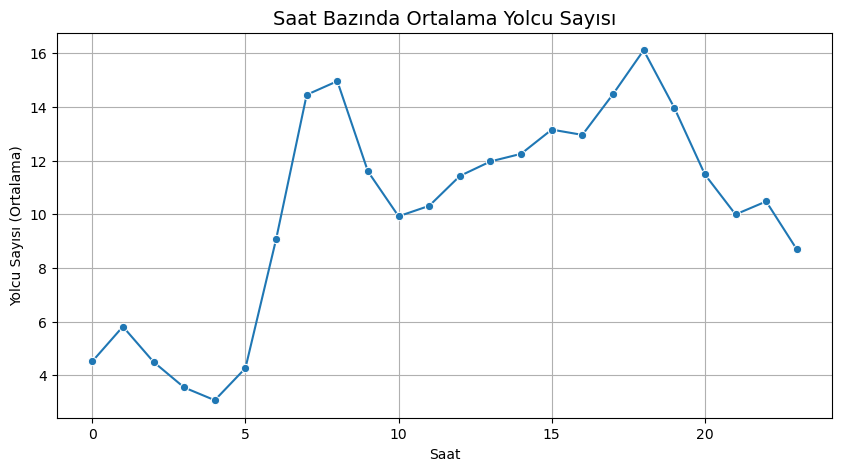

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Saat bazında ortalama yolcu sayısı
hourly = data.groupby('transition_hour')['number_of_passenger'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='transition_hour', y='number_of_passenger', data=hourly, marker='o')
plt.title("Saat Bazında Ortalama Yolcu Sayısı", fontsize=14)
plt.xlabel("Saat")
plt.ylabel("Yolcu Sayısı (Ortalama)")
plt.grid(True)
plt.show()

/var/folders/7t/rljhdmdn7w35qp72rw9zrq180000gn/T/ipykernel_40679/3164935745.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_passenger', y='line', data=line_usage, palette='Blues_r')


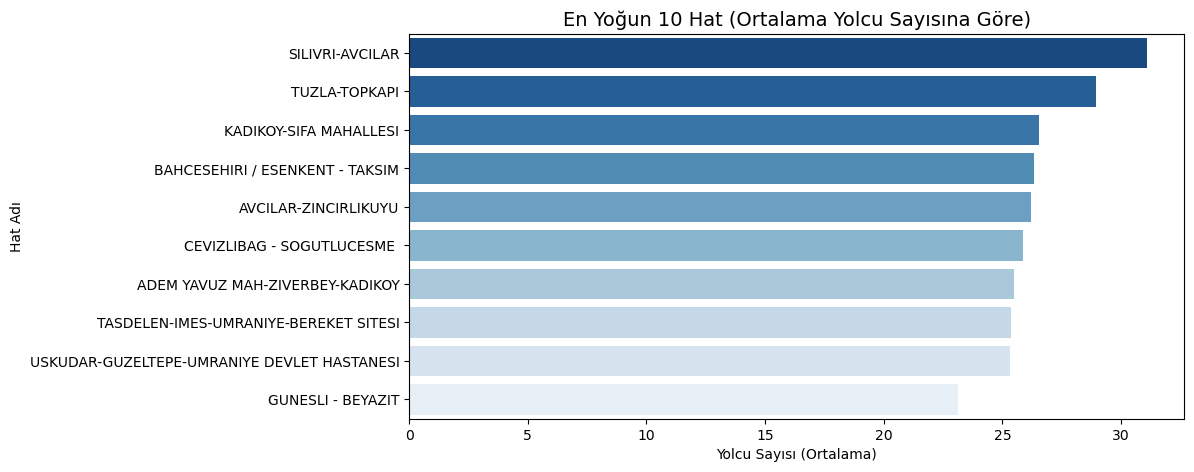

In [16]:
# Hat bazında ortalama yolcu sayısı
line_usage = data.groupby('line')['number_of_passenger'].mean().reset_index()
line_usage = line_usage.sort_values(by='number_of_passenger', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='number_of_passenger', y='line', data=line_usage, palette='Blues_r')
plt.title("En Yoğun 10 Hat (Ortalama Yolcu Sayısına Göre)", fontsize=14)
plt.xlabel("Yolcu Sayısı (Ortalama)")
plt.ylabel("Hat Adı")
plt.show()

/var/folders/7t/rljhdmdn7w35qp72rw9zrq180000gn/T/ipykernel_40679/519443039.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='road_type', y='number_of_passenger', data=mode_usage, palette='coolwarm')


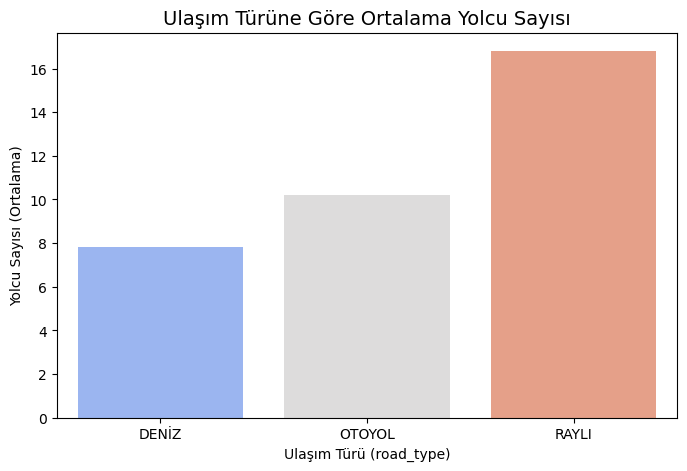

In [17]:
# Ulaşım türü bazında ortalama yolcu sayısı
mode_usage = data.groupby('road_type')['number_of_passenger'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='road_type', y='number_of_passenger', data=mode_usage, palette='coolwarm')
plt.title("Ulaşım Türüne Göre Ortalama Yolcu Sayısı", fontsize=14)
plt.xlabel("Ulaşım Türü (road_type)")
plt.ylabel("Yolcu Sayısı (Ortalama)")
plt.show()

/var/folders/7t/rljhdmdn7w35qp72rw9zrq180000gn/T/ipykernel_40679/2859673350.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_passenger', y='town', data=town_usage, palette='viridis')


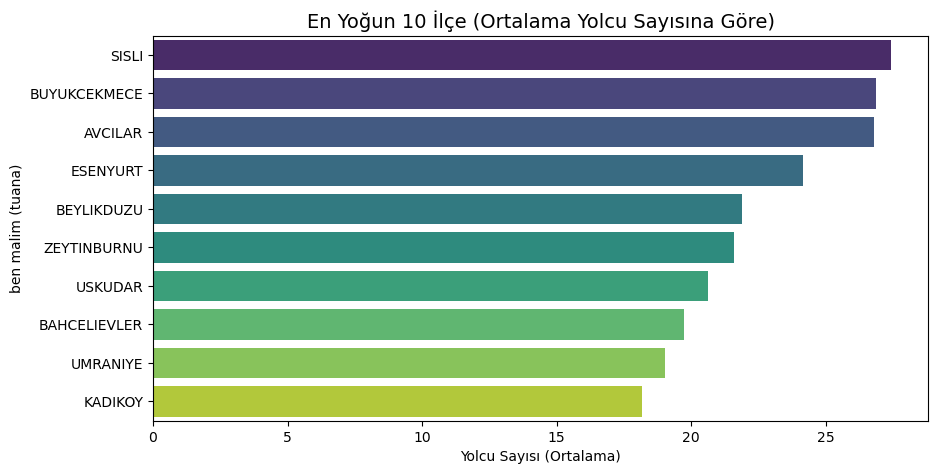

In [18]:
# İlçelere göre ortalama yolcu sayısı
town_usage = data.groupby('town')['number_of_passenger'].mean().reset_index()
town_usage = town_usage.sort_values(by='number_of_passenger', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='number_of_passenger', y='town', data=town_usage, palette='viridis')
plt.title("En Yoğun 10 İlçe (Ortalama Yolcu Sayısına Göre)", fontsize=14)
plt.xlabel("Yolcu Sayısı (Ortalama)")
plt.ylabel("ben malim (tuana)")

plt.show()